* Execute a fila M/M/1 gerando n clientes (N=10^5, 10^6, 10^7, 10^8) após o fim do transiente:
   
   ** taxa de entrada: λ=9 clientes por segundo.
   
   ** taxa de serviço: μ=10 clientes por segundo.

Para cada execução, calcule Wbarra, o tempo médio de espera na fila e o respectivo intervalo de confiança de 95%.

* Plotar um gráfico de  Wbarra   em função de N.

* Plotar uma linha para o ponto contendo o valor teórico esperado, dado pela seguinte fórmula:

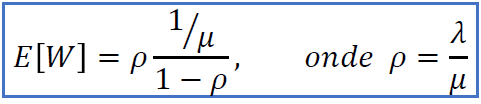

In [8]:
import random                      
import simpy # biblioteca de simulação
import math as mt
import numpy as np
from tqdm import tqdm
import statistics as ss
import scipy.stats as st
import matplotlib.pyplot as plt

In [9]:
taxaEntrada = 9           # taxa de entrada: λ=9 clientes por segundo. 
taxaServico = 10          # taxa de serviço: μ=10 clientes por segundo.

In [74]:
def media(lista):
    soma = 0
    for i in range(len(lista)):
        soma += lista[i]
    return soma/len(lista)

def varAmostral(lista):
    m = media(lista)
    soma = 0
    for i in range(len(lista)):
        soma += (lista[i]-m)**2
    return soma/(len(lista)-1)
      
def desPadrao(lista):
    dp = mt.sqrt(varAmostral(lista))
    return dp

def exponencial(b):
    u = random.random()
    x = -b * mt.log(1-u)

    return(x)

In [75]:
def tempoQuantiMedia(quanti, media):
    return [-(1/media) *  np.log(1 - np.random.uniform(0,1)) for _ in range(quanti-1)]

In [112]:
def mm1(n, lamb, mi):
    medioEsperaFila = tempoQuantiMedia(n, lamb)
    servicos = tempoQuantiMedia(n, mi)
    filaEsperas = [0]
    espera = 0
    i = 0
    while i < len(medioEsperaFila):
        servicoCompleto = servicos[i] + filaEsperas[-1]
        if (medioEsperaFila[i] <= servicoCompleto):
             espera = (servicos[i] - medioEsperaFila[i]) + filaEsperas[-1]
        else:
             espera = 0
        filaEsperas.append(espera)
        i+=1
    return (filaEsperas)

In [113]:
def mser5y(nClientes, x):
    auxList = []
    aux = 0
    z = []
    i = j =0
    while i < nClientes:
        while j < 5:
            auxList.append(x[i])
            i +=1
            j +=1
        z.append(media(auxList))
        auxList.clear()
        j=0
    mser5yList = []
    k = nClientes/5
    meio = k/2
    d = 0
    while d < meio:
        desvpZ = ss.fmean(z)
        aux = desvpZ / mt.sqrt(k-d)
        mser5yList.append(aux)
        d += 1
        del z[0]
    menor = min(mser5yList)              
    posicao = mser5yList.index(menor)
    return posicao

In [116]:
def truncagem(nClientes):
    i =0
    n = nClientes
    x = mm1(n, 9, 10) # 10^5
    mser5yList =  mser5y(n, x)

    while mser5yList == 0:
        print('Ainda não se encontrou o ponto de truncagem.\n')
        print('A coletar mais informações até que se encontre...')
        n += 2000  
        x = mm1(n, 9, 10)
        mser5yList = mser5y(n, x)

    print('Encontrou o fim do transiente...')
    print('Eliminando as observações do estado transiente...')
    print('Tamanho de M/M/1 final:', len(x))
    pontoTruc = mser5yList * 5
    print(f'Encontrou-se o ponto de truncagem. Na posição {pontoTruc} da fila')
    #eliminando transiente
    while i < pontoTruc:
        del x[0]
        i +=1

    print('Tamanho de M/M/1 após o corte: ', len(x), '\nAgora está no estado estacionario.\n')
    
    wbarra = sum(x)/len(x)
    print('Wbarra: ', wbarra)
    
    z = 1.96 * desPadrao(x)/mt.sqrt(n)
    
    interaloPositivo = wbarra + z
    interaloNegativo = wbarra - z
    
    print(f'Intervalo de confiança: ({interaloPositivo}, {interaloNegativo})', )
    
    return wbarra

In [117]:
pontosY = [truncagem(1000), truncagem(10100), 
           truncagem(10200), truncagem(10300),
          truncagem(10400), truncagem(10500)]

Encontrou o fim do transiente...
Eliminando as observações do estado transiente...
Tamanho de M/M/1 final: 1000
Encontrou-se o ponto de truncagem. Na posição 470 da fila
Tamanho de M/M/1 após o corte:  530 
Agora está no estado estacionario.

Wbarra:  0.2976907919512997
Intervalo de confiança: (0.3161648360044536, 0.2792167478981458)
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se encontre...
Ainda não se encontrou o ponto de truncagem.

A coletar mais informações até que se enco

In [105]:
def E(): # calculo do valor teorico
    e = 10*((1/9)/(1-10))
    return e

In [106]:
valorTeorico = E()
pontosX = [valorTeorico+(i+1) for i in range(6)]
print(pontosX)

[0.8765432098765432, 1.876543209876543, 2.876543209876543, 3.876543209876543, 4.8765432098765435, 5.8765432098765435]


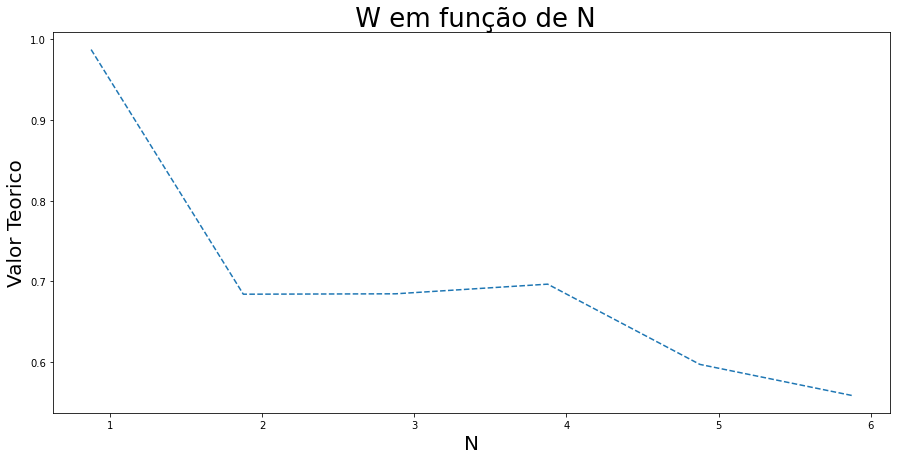

In [107]:
plt.figure(figsize=(15,7))

plt.title(' W em função de N', fontsize=26)
plt.xlabel('N', fontsize=20)
plt.ylabel('Valor Teorico', fontsize=20)

plt.plot(pontosX, pontosY, '--')
plt.show()

Ao rodar uma simulação onde as variaveis são bem distribuidas e com valor teorico aumentando há uma queda no tempo de serviço na fila, resultando no grafico acima.